# <font color=#58C1C4> Procesamiento de Imágenes con machine learning en Python</font>
### <span style="background-color: #d9d9d9;"> Modelos predictivos e Inteligencia Artificial </span>
#### <font color=#a6a6a6> Marzo 2019</font>  
**PROFESOR**: 
**Ignacio Martí - Digital Intelligence - KingEclient**


En este notebook se muestran una serie de conceptos básicos de tratamiento de imágenes en Python, y se aborda un problema de clasificación de imágenes con Machine Learning.

## MNIST 
El set de datos de MNIST (Modified National Institute of Standards and Technology) es muy conocido en problemas de tratamiento y clasificación de imágenes con Machine Learning y Deep Learning y sirve como problema de prueba con el que se desarrollan y miden la mayoría de los algoritmos de clasificación de imágenes.

Consite en un set de imágenes con dígitos escritos a mano. Cada imagen, en blanco y negro y de 28x28 píxeles, contiene un dígito del 0 al 9, y está anotada (está identificado el dígito que contiene). 

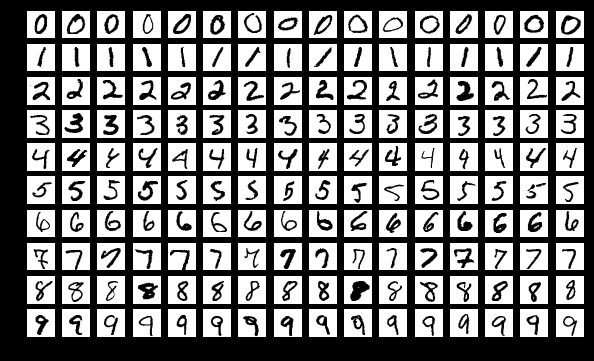

El problema consiste en identificar, dada una imagen, a cual de los dígitos corresponde (es un problema de clasificación). El set de datos contiene 70.000 imágenes de dígitos escritos a mano, separadas en 60.000 de training y 10.000 de testing.

## Librerías 

Las librerías que utilizaremos para el manejo y visualización de datos así como el entrenamiento de los modelos son:
 - Numpy: proporciona un objeto de tipo 'array' para trabajar con arrays numéricos.
 - pandas: proporciona la clase 'DataFrame', para el manejo de tablas de datos (muy similar a R).
 - matplotlib: librería de dibujo integrada con pandas.
 - scikit-learn: implementa los algoritmos de machine learning mas utilizados.
 - seaborn: una librería de dibujo que añade una capa mas de abstracción sobre _matplotlib_.

Adicionalmente, utilizaremos _scikit-image_, una librería específica para el tratamiento de imágenes desarrollada como parte de scikit.

Importamos algunas de estas librerías: (Nota: podemos importar mas librerías mas adelante si lo necesitamos)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import skimage

In [2]:
%matplotlib inline
np.random.seed(0)
mpl.rc("figure", figsize=(12, 12))

## Tratamiento de imágenes

La librería _scikit-image_ proporciona una serie de operaciones que nos permiten trabajar con imágenes y que serán útiles para el desarrollo (y sobre todo el consumo) del modelo.

In [3]:
from skimage import io

Podemos cargar una imagen directamente como un array de numpy:

In [4]:
img1 = io.imread('cat2.jpg')
print(type(img1))
print(img1.shape) # 1920x1080 pixeles, 3 canales (RGB)

<class 'numpy.ndarray'>
(1080, 1920, 3)


Podemos mostrar una imagen directamente con _imshow_:

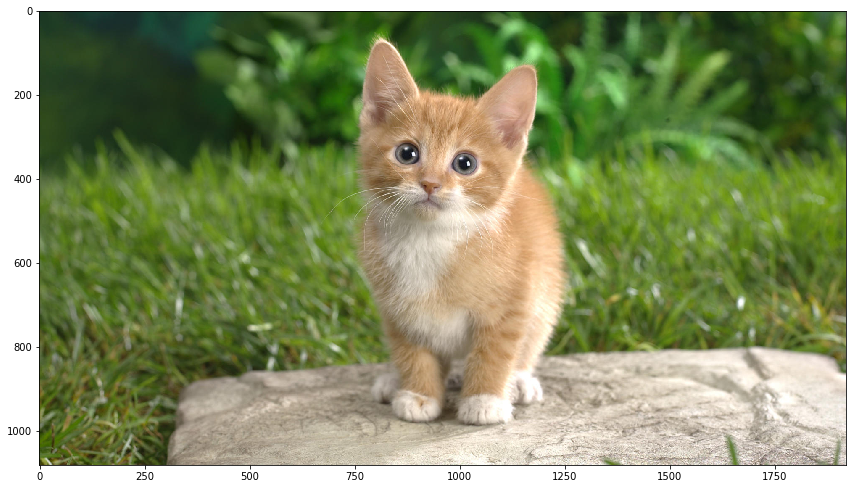

In [5]:
io.imshow(img1)

Podemos manejar la imagen igual que haríamos con cualquier array de numpy. Por ejemplo, podemos intercambiar los colores de la imagen...

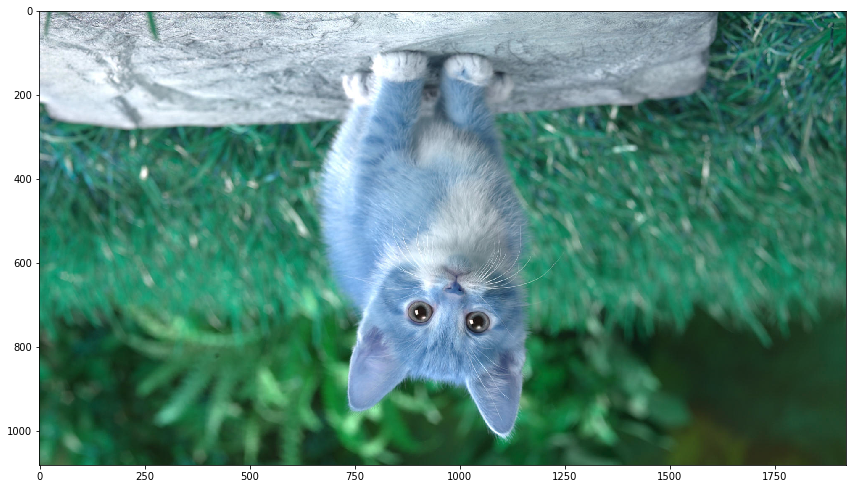

In [6]:
io.imshow(img1[::-1,::-1,::-1])

También podemos recortar una parte...

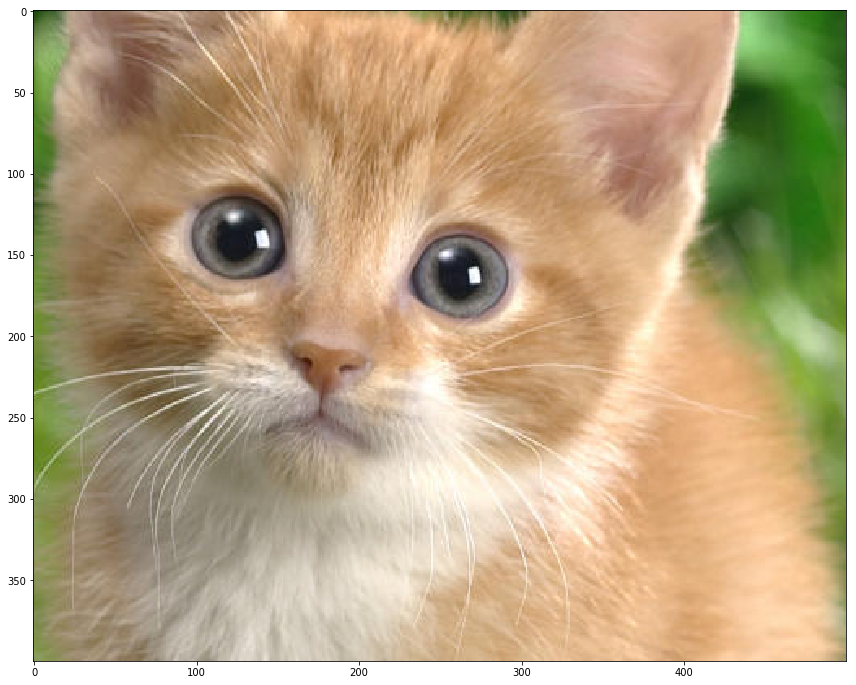

In [7]:
io.imshow(img1[200:600, 750:1250, :])

### Reescalado

El reescalado consiste en cambiar la resolución de la imagen alterando su contenido lo mínimo posible. En general no es una operación sencilla (por ejemplo, pueden producirse efectos como el 'aliasing') y hay varios métodos de hacerlo. 

La forma mas básica consiste en eliminar 1 de cada $n$ píxeles, aunque esto tiene sus limitaciones y solo nos permite dividir el tamaño de la imagen entre $n^2$.

(270, 480, 3)


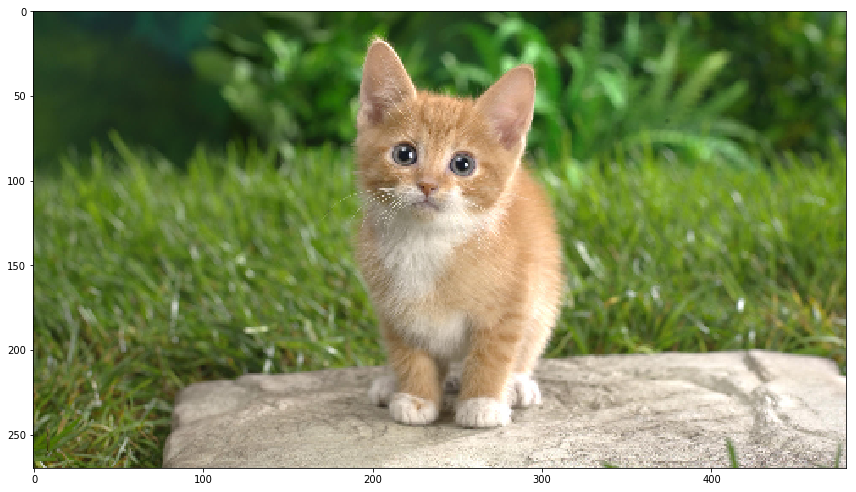

In [8]:
print(img1[::4,::4,:].shape)
io.imshow(img1[::4,::4,:]) # Cogiendo 1 de cada 4 píxeles en horizontal y vertical (16 veces mas pequeña)

Vemos que la imagen sigue siendo reconocible, pero se notan cambios bruscos entre los píxeles. Afortunadamente, la librería _scikit-image_ tiene funciones que permiten hacer un mejor reescalado y a cualquier resolución.

In [9]:
from skimage import transform

(270, 480, 3)


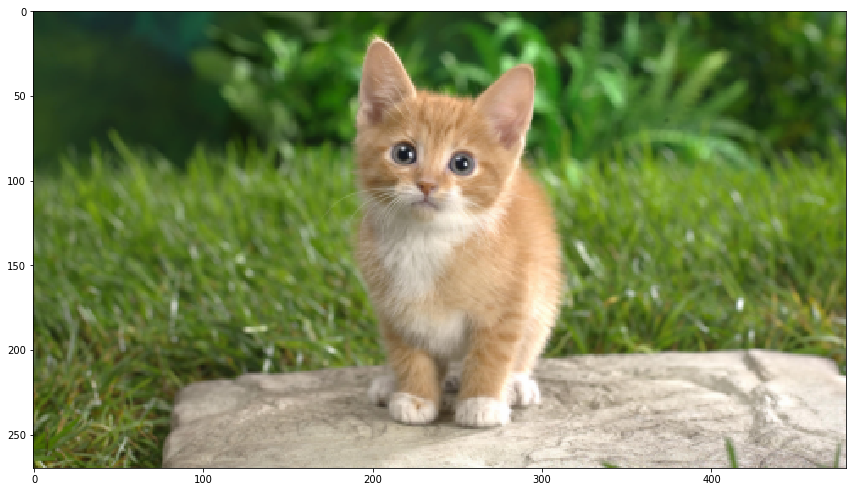

In [10]:
img1_re = transform.resize(image=img1, output_shape=(270, 480), anti_aliasing=True, mode='reflect')
print(img1_re.shape)
io.imshow(img1_re) # Cogiendo 1 de cada 4 píxeles en horizontal y vertical (16 veces mas pequeña)

### Blanco y negro

La imagen que hemos elegido tiene 3 canales (Red, Green, Blue), pero para el reconocimiento de dígitos el color no nos aporta demasiada información. Hay varias formas posibles de transfomrmar una imagen a blanco y negro, pero la mas habitual es hacer un promedio (que puede ser ponderado) de los valores de los tres colores en cada pixel.

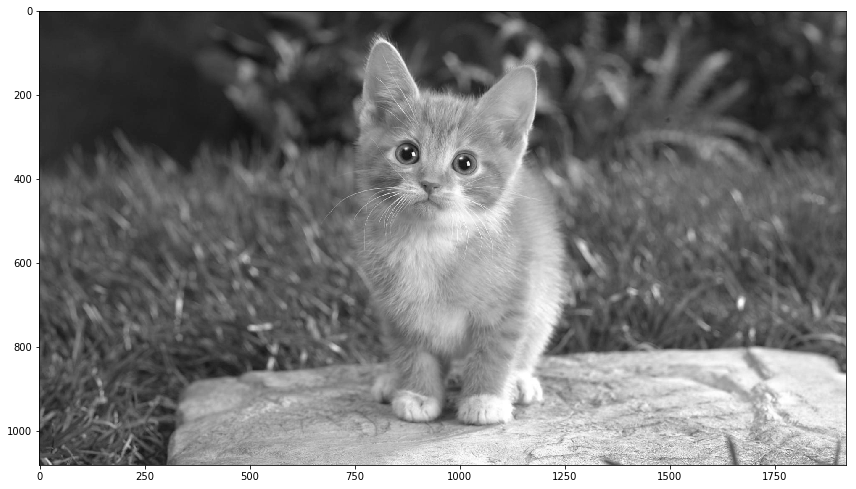

In [11]:
io.imshow(np.mean(img1, axis=2).astype('uint8')) # Un promedio simple

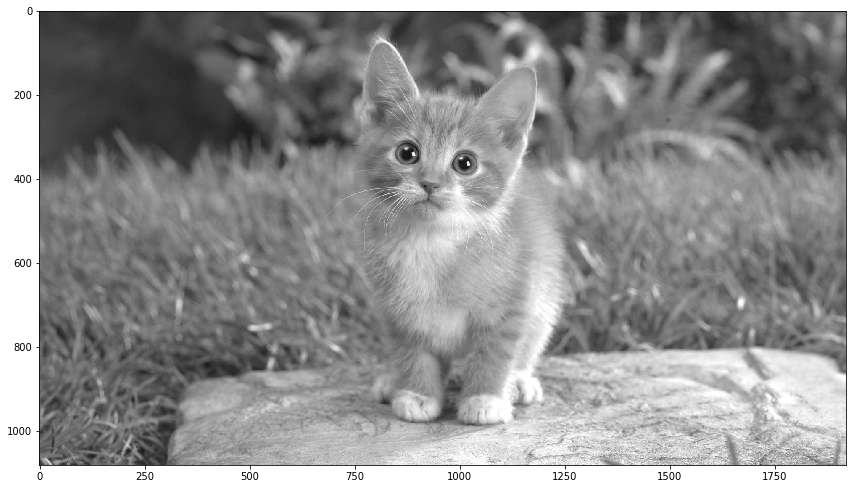

In [12]:
io.imshow((0.0*img1[:,:,0]+1.0*img1[:,:,1]+0.0*img1[:,:,2]).astype('uint8')) # Un promedio ponderado

También se puede coger el máximo, minimo...

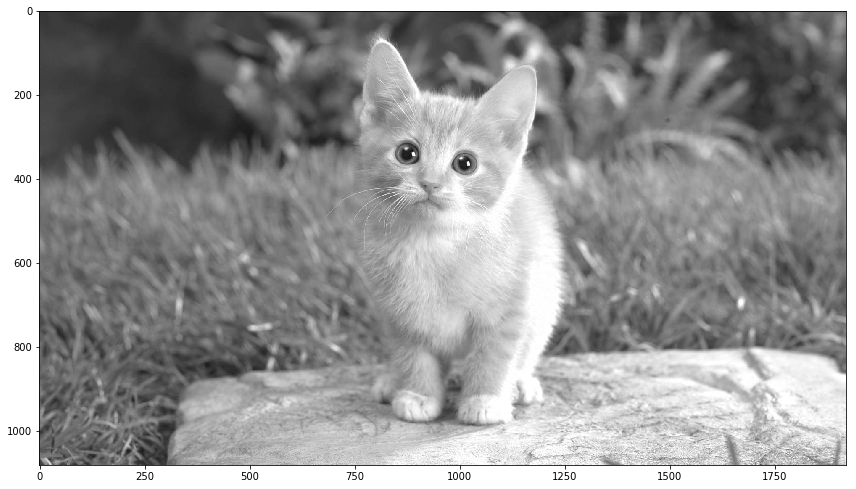

In [13]:
io.imshow(np.max(img1, axis=2).astype('uint8')) # El máximo

### Filtrado

En general, el filtrado es una función aplicada sobre cada pixel de la imagen. Esta función puede ser sencilla y depender solo del valor del propio pixel, puede depender de los píxeles vecinos, o incluso requerir varias iteraciones...

La librería _scikit-image_ proporciona numerosos filtros, aunque para el problema de clasificación no vamos a utilizarlos.

In [14]:
from skimage import filters

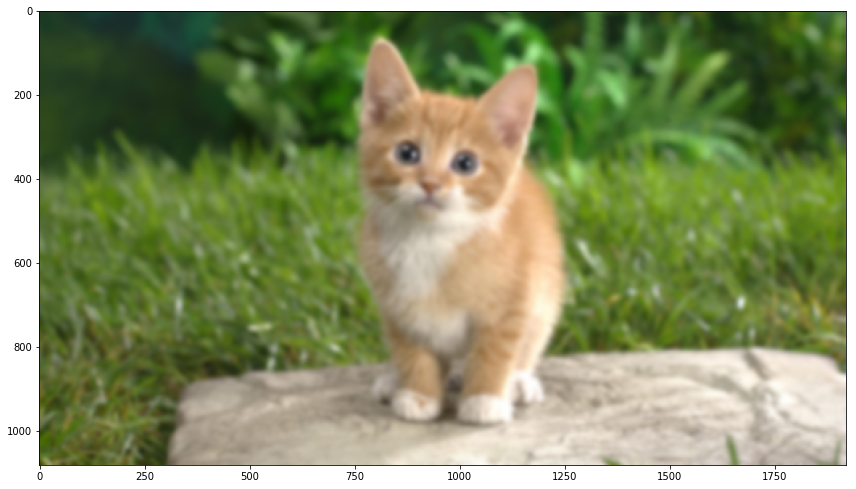

In [15]:
io.imshow(filters.gaussian(img1, multichannel=True, sigma=5)) # Filtro gausiano

### Enmascarado

El enmascarado (masking) consiste en seleccionar regiones de la imagen (conjuntos de píxeles) en base a unas condiciones dadas para tratarlos de forma independiente. 

Por ejemplo, si queremos seleccionar los píxeles que contengan 'mucho' verde:

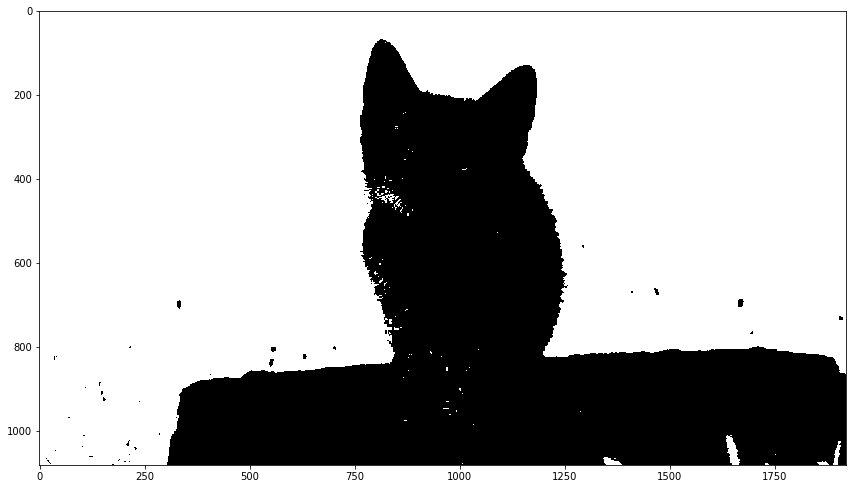

In [16]:
pix_verdes = img1[:,:,1]/np.sum(img1, axis=2) > 0.35 # creamos una máscara
io.imshow(pix_verdes)

Ahora podemos tratar de forma independiente los píxeles. Por ejemplo, podemos volver el cesped azul.

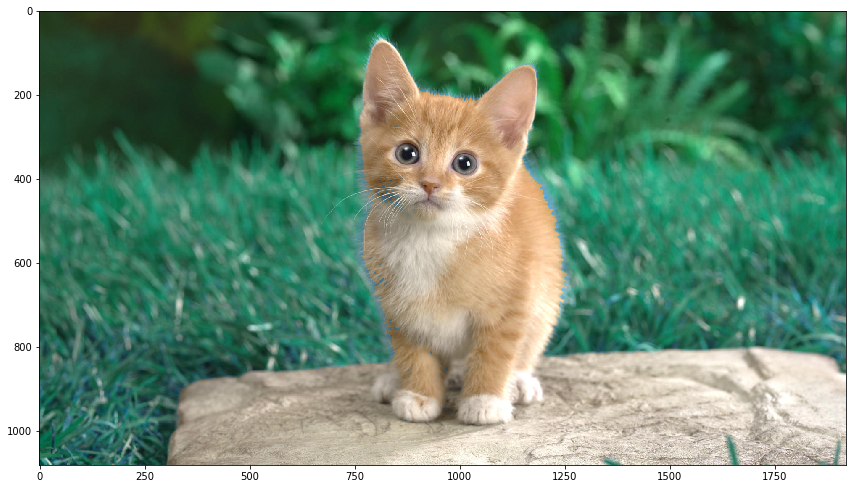

In [17]:
img1_ma = np.array(img1)
img1_ma[pix_verdes, 0] = img1[pix_verdes, 2]
img1_ma[pix_verdes, 2] = img1[pix_verdes, 0]
io.imshow(img1_ma)

## Carga del set de datos

Los datos están guardados a través de _pickle_ como una variable de Python. Los podemos cargar de la siguiente manera:

In [18]:
import os
import pickle
with open('MNIST_data/MNIST_train.dat', 'rb') as f:
    (X_train, y_train) = pickle.load(f)
with open('MNIST_data/MNIST_test.dat', 'rb') as f:
    (X_test, y_test) = pickle.load(f)

Las imágenes están organizadas como un array de numpy. El set de training, de 60.000 imágenes, consiste en un vector de 60.000x28x28, donde la primera dimensión indica el número de imagen, la segunda la posición del pixel en horizontal y la tercera en vertical. Las etiquetas (variable 'y') consisten en una lista de números del 0 al 9 ordenados en un vector de 60.000 elementos. 

In [19]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


El set de testing es equivalente solo que con 10.000 imágenes.

In [20]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


El valor de cada pixel va de 0 a 255.

In [21]:
(np.min(X_test[0]), np.max(X_test[0]))

(0, 255)

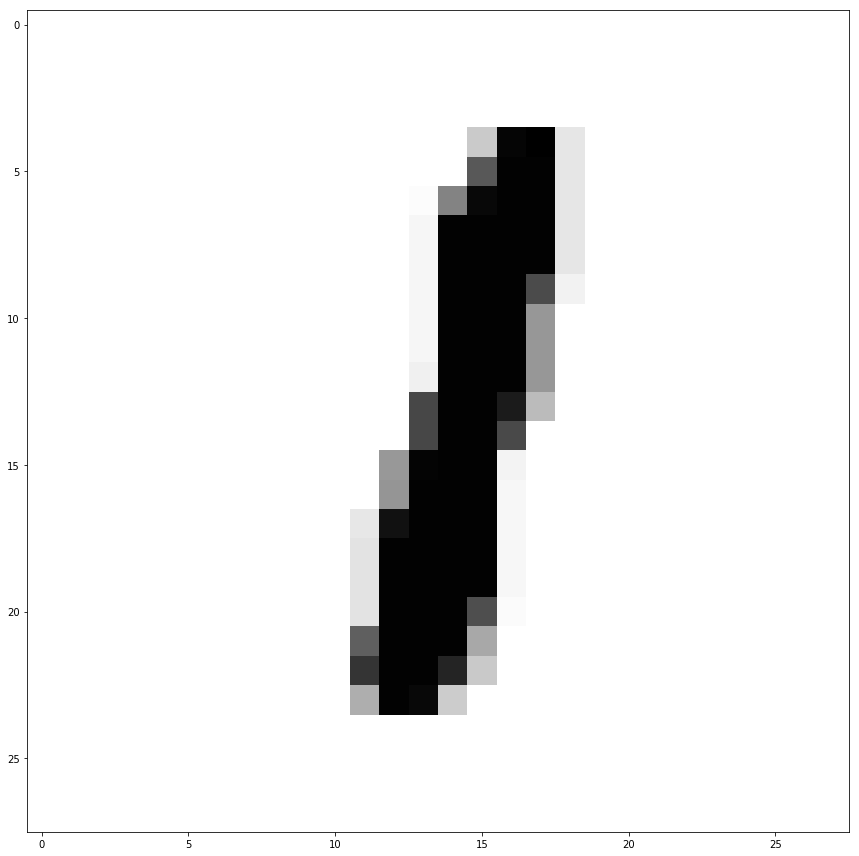

In [24]:
io.imshow(255-X_train[208,:,:])

## Desarrollo del modelo

Las imagenes del set de datos están bastante 'limpias': todas tienen la misma resolución, los números están centrados, etc... Teniendo esto en cuenta, en la primera versión del modelo podemos probar a trabajar directamente con los valores de los píxeles como variables de entrada. 

Para ello simplemente 'aplanamos' las imagenes (pasamos de un array 28x28 a un vector de 784) y lo normalizamos.

In [25]:
X_train_n = (X_train.reshape(X_train.shape[0],-1) / 255.0)*2.0 - 1.0
X_test_n = (X_test.reshape(X_test.shape[0],-1) / 255.0)*2.0 - 1.0

In [26]:
print(X_train_n.shape)
print(X_test_n.shape)

(60000, 784)
(10000, 784)


In [28]:
y_train[:30]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7], dtype=uint8)

Ahora podemos directamente entrenar un clasificador.

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
ext1 = ExtraTreesClassifier(n_estimators=100, random_state=123)
ext1.fit(X=X_train_n[::10,:], y=y_train[::10]) # cogemos solo el 10% por tiempo de cálculo

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [32]:
print(ext1.score(X=X_train_n, y=y_train))
print(ext1.score(X=X_test_n, y=y_test)) # Nota: con el dataset completo da 0.972

0.9465333333333333
0.9438


In [33]:
from sklearn import svm
svm1 = svm.LinearSVC()
svm1.fit(X=X_train_n[::10,:], y=y_train[::10]) # cogemos solo el 10% por tiempo de cálculo

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [35]:
print(svm1.score(X=X_train_n, y=y_train))
print(svm1.score(X=X_test_n, y=y_test)) # Nota: con el dataset completo da 0.972

0.85295
0.8503


### HOG Features

Aunque hemos visto que podemos conseguir un buen porcentaje de acierto simplemente utilizando los píxeles, en la práctica este método es muy poco robusto frente a pequeñas variaciones en la escala, orientación y posición de los dígitos en la imagen. 

Para mejorar esto lo que se hace es extraer información de la imagen en forma de _features_ (es decir, vectorizar la imagen). Se han ido desarrollando una gran variedad de features que aplican a determinadas situaciones, pero uno de los mas populares es el HOG (Histogram of Oriented Gradients). 

In [36]:
from skimage.feature import hog

Sin entrar en muchos detalles, las _HOG Features_, como su nombre indica, consisten en un histograma del número de gradientes que apuntan en unas determinadas direcciones en varias zonas de la imagen. 

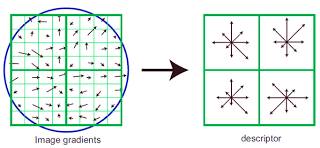

El número de direcciones a considerar y el tamaño de las ventanas son parámetros de la transformación.

Podemos obtener el vector correspondiente de la siguiente manera:

In [37]:
img1_hog, img1_hog_pic = hog(np.mean(img1,axis=2)/255.0,  # Imagen en blanco y negro
                             orientations=8, # 8 direcciones 
                             pixels_per_cell=(32, 32), # ventanas de 32x32
                             cells_per_block=(1, 1), 
                             visualize=True, # para obtener el array de visualizacion
                             block_norm='L1')

Nota: la librería también proporciona una forma de visualizar el resultado, devolviendo una variable adicional (en este caso, 'img1_hog_pic').

In [38]:
img1_hog.shape

(15840,)

/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


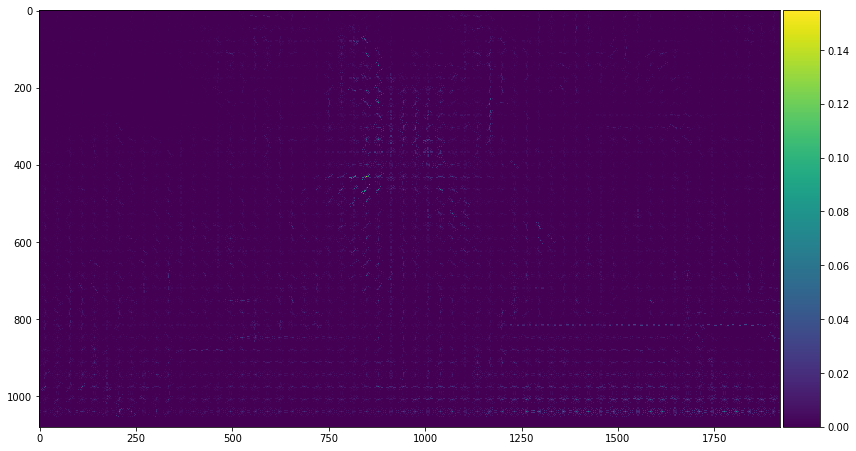

In [39]:
io.imshow(img1_hog_pic)

Para mejorar nuestro modelo, podemos utilizar los vectores obtenidos por los HOG en lugar de los píxeles.

In [40]:
X_train_hog = np.concatenate([np.concatenate([hog(xi/255.0, orientations=8, 
                                                   pixels_per_cell=(ppc, ppc),
                                                   cells_per_block=(1, 1), 
                                                   visualize=False,
                                                   block_norm='L1')[np.newaxis, :] for xi in X_train[::10,:,:]],
                                              axis=0) for ppc in [14,7,4]], axis=1)
X_test_hog = np.concatenate([np.concatenate([hog(xi/255.0, orientations=8, 
                                                   pixels_per_cell=(ppc, ppc),
                                                   cells_per_block=(1, 1), 
                                                   visualize=False,
                                                   block_norm='L1')[np.newaxis, :] for xi in X_test[::10,:,:]],
                                              axis=0) for ppc in [14,7,4]], axis=1)

In [41]:
print(X_train_hog.shape)
print(X_test_hog.shape)

(6000, 552)
(1000, 552)


In [42]:
ext2 = ExtraTreesClassifier(n_estimators=100, random_state=123)
ext2.fit(X=X_train_hog, y=y_train[::10]) # cogemos solo el 10% por tiempo de cálculo

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [43]:
print(ext2.score(X=X_train_hog, y=y_train[::10]))
print(ext2.score(X=X_test_hog, y=y_test[::10])) # Nota: con el dataset completo da 0.9777

1.0
0.959


In [44]:
svm2 = svm.LinearSVC()
svm2.fit(X=X_train_hog, y=y_train[::10]) # cogemos solo el 10% por tiempo de cálculo

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [45]:
print(svm2.score(X=X_train_hog, y=y_train[::10]))
print(svm2.score(X=X_test_hog, y=y_test[::10])) # Nota: con el dataset completo da 0.9777

0.9983333333333333
0.953


### Matrices de confusión

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
cm_ext1 = confusion_matrix(y_test[::10], ext1.predict(X_test_n[::10,:]), labels=list(range(10)))
pd.DataFrame(cm_ext1, index = list(range(10)), columns = list(range(10)))

0    1   2    3   4   5   6    7   8   9
0  94    0   0    0   0   0   1    0   1   0
1   0  115   0    0   0   0   0    0   0   0
2   0    0  83    2   1   0   1    1   1   0
3   0    0   4  118   0   0   0    1   0   0
4   0    0   0    0  78   0   1    0   0   8
5   1    0   0    5   1  90   1    0   1   0
6   2    0   0    0   1   0  84    0   1   0
7   0    3   2    0   2   0   0  100   1   3
8   0    0   1    1   0   1   2    1  83   0
9   0    2   0    1   5   0   0    2   1  92

In [48]:
cm_ext2 = confusion_matrix(y_test[::10], ext2.predict(X_test_hog), labels=list(range(10)))
pd.DataFrame(cm_ext2, index = list(range(10)), columns = list(range(10)))

0    1   2    3   4   5   6    7   8   9
0  94    0   0    0   0   0   1    0   1   0
1   0  114   0    0   0   0   0    1   0   0
2   0    0  89    0   0   0   0    0   0   0
3   0    0   0  122   0   1   0    0   0   0
4   0    0   1    0  81   0   1    0   0   4
5   1    0   0    3   0  95   0    0   0   0
6   2    0   1    0   1   1  83    0   0   0
7   0    1   0    0   0   0   0  104   0   6
8   1    0   0    1   1   1   1    1  83   0
9   0    2   0    1   2   0   0    3   1  94

## Consumo del modelo

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [50]:
class ReshapeAndScale(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return (X.reshape(X.shape[0],-1) / 255.0)*2.0 - 1.0

In [51]:
pip1 = Pipeline( [('scale', ReshapeAndScale()),
                 ('trees', ExtraTreesClassifier(n_estimators=100, random_state=123))] )
pip1.fit(X_train[::10,:,:], y_train[::10])
pip1.score(X_test, y_test)

0.9438

In [52]:
class HOGv(BaseEstimator, TransformerMixin):
    def __init__(self, no=8, ppcs=[14,7,4]):
        self.no = no
        self.ppcs = ppcs
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.concatenate([np.concatenate([hog(xi/255.0, orientations=self.no, 
                                                   pixels_per_cell=(ppc, ppc),
                                                   cells_per_block=(1, 1), 
                                                   visualize=False,
                                                   block_norm='L1')[np.newaxis, :] for xi in X],
                                              axis=0) for ppc in self.ppcs], axis=1)

In [53]:
pip2 = Pipeline( [('scale', HOGv()),
                 ('trees', ExtraTreesClassifier(n_estimators=100, random_state=123))] )
pip2.fit(X_train[::10,:,:], y_train[::10])
pip2.score(X_test, y_test)

0.9646

### Pruebas con nuevas imágenes

In [54]:
def centro(imm):
    immn = np.array(imm)
    Xcm, Ycm = np.meshgrid(range(immn.shape[0]), range(immn.shape[1]))
    xcm = int(np.round(np.sum((Xcm*immn.T)[:]) / np.sum(immn[:])))
    ycm = int(np.round(np.sum((Ycm*immn.T)[:]) / np.sum(immn[:])))
    return (xcm, ycm)

In [55]:
def preparar(imm):
    im_bw = 1.0 - (np.mean(imm, axis=2) / 255.0)
    #im_bw = imm[:,:,2]/np.sum(imm,axis=2)
    im_bw /= np.max(im_bw)
    mask = im_bw > 0.5
    im_bwm = np.array(im_bw)
    im_bwm[~mask] = 0.0
    
    nnz_x = np.nonzero(np.sum(mask, axis=1))[0]
    nnz_y = np.nonzero(np.sum(mask, axis=0))[0]
    xcm, ycm = centro(im_bwm)
    box = int(np.max([abs(nnz_x[0]-xcm),abs(nnz_x[-1]-xcm),abs(nnz_y[0]-ycm),abs(nnz_y[-1]-ycm)])*1.25)

    im_bw[im_bw < 0.3] = 0.0
    im_bw = im_bw[(xcm-box):(xcm+box), (ycm-box):(ycm+box)]
    im_bw = transform.resize(image=im_bw, output_shape=(28,28), anti_aliasing=True, mode='reflect')
    im_bw /= np.max(im_bw)
    im_bw[im_bw>0.0]*=10.0
    im_bw[im_bw>1.0]=1.0
    im_bw = (255*im_bw).astype('uint8')
    return im_bw[np.newaxis,:,:]

## Pruebas

/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


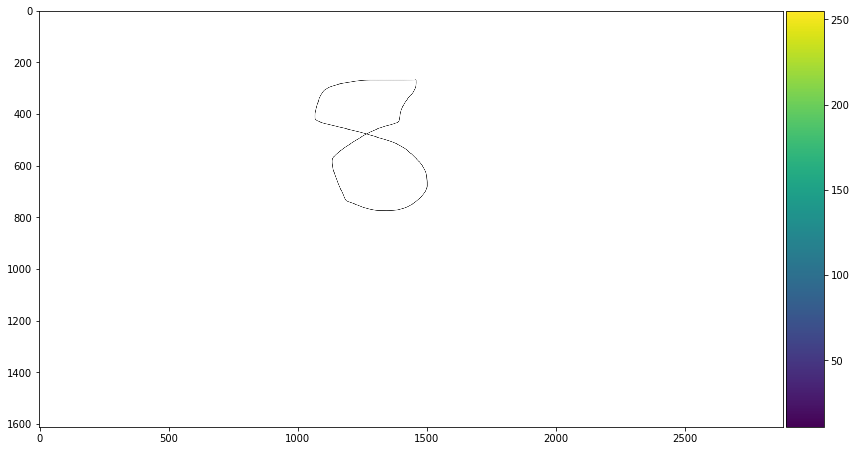

In [61]:
test_im = io.imread('test_i/pruebas/Image_008.png')
io.imshow(test_im)

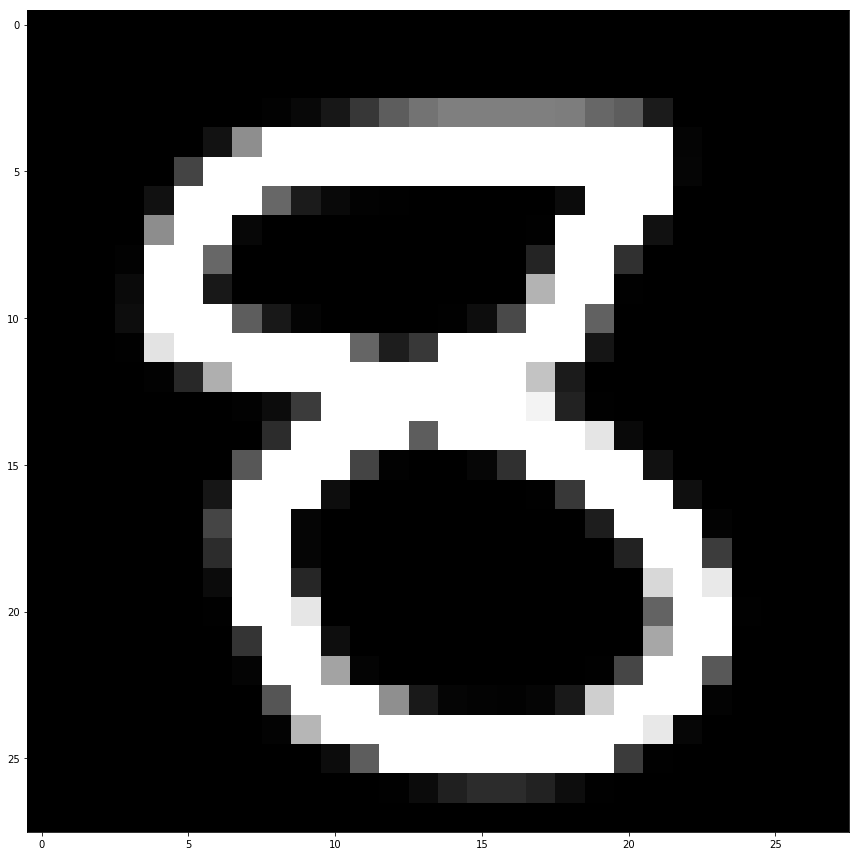

In [62]:
test_im_p = preparar(test_im)
io.imshow(test_im_p[0,:,:])

In [63]:
pip1.predict(test_im_p)

array([3], dtype=uint8)

In [64]:
pip2.predict(test_im_p)

array([3], dtype=uint8)

### Mas imágenes

In [55]:
pth = 'test_i/imagenes/'
h_ims = np.concatenate([preparar(io.imread(fname=pth+ff)) for ff in os.listdir(pth)], axis=0)
h_lab = np.fromiter([int(ff[0]) for ff in os.listdir(pth)], dtype=int)

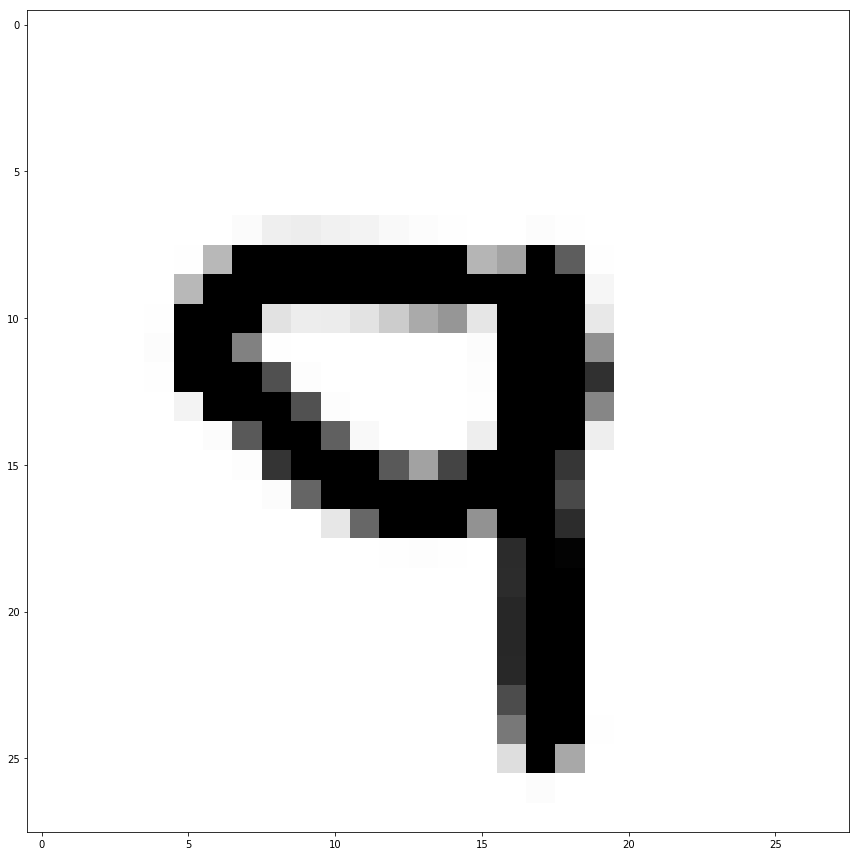

In [56]:
io.imshow(255-h_ims[1,:,:])

In [57]:
h_lab

array([8, 9, 9, 3, 1, 5, 5, 7, 0, 2, 6, 4])

In [58]:
pip1.predict(h_ims)

array([0, 9, 1, 3, 1, 0, 5, 7, 0, 2, 5, 4], dtype=uint8)

In [94]:
pip2.predict(h_ims)

array([3, 7, 9, 3, 1, 5, 5, 7, 0, 2, 5, 4], dtype=uint8)